In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.AllChem import GetBestRMS
from rdkit import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage

**Note** - Before starting, I aligned the two protein structures

Turn atom numbering off

In [2]:
IPythonConsole.drawOptions.addAtomIndices = False

Define a template for bond order assignment from ligand SMILES

In [3]:
tmplt_smiles = "O=C1CCCN1Nc1cc(Nc2cccc(F)c2)ncn1"
tmplt_mol = Chem.MolFromSmiles(tmplt_smiles)

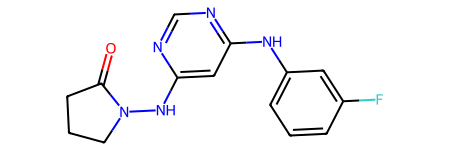

In [4]:
tmplt_mol

Ligand PDB file from pred.model_idx_0.rank_0.cif

In [5]:
model_pdb_str = """HETATM 1265  O_1 LIG B   1       0.168  -3.094  10.476  1.00 92.44           O
HETATM 1266  C_1 LIG B   1      -0.824  -2.693   9.860  1.00 91.86           C
HETATM 1267  C_2 LIG B   1      -1.956  -3.481   9.513  1.00 91.97           C
HETATM 1268  C_3 LIG B   1      -2.864  -2.567   8.859  1.00 90.51           C
HETATM 1269  C_4 LIG B   1      -2.300  -1.273   8.866  1.00 89.82           C
HETATM 1270  N_1 LIG B   1      -1.051  -1.419   9.451  1.00 92.82           N
HETATM 1271  N_2 LIG B   1      -0.234  -0.371   9.670  1.00 92.61           N
HETATM 1272  C_5 LIG B   1       1.107  -0.337   9.342  1.00 94.99           C
HETATM 1273  C_6 LIG B   1       1.910   0.678   9.868  1.00 97.03           C
HETATM 1274  C_7 LIG B   1       3.229   0.655   9.497  1.00 96.53           C
HETATM 1275  N_3 LIG B   1       4.110   1.592   9.987  1.00 96.38           N
HETATM 1276  C_8 LIG B   1       3.803   2.647  10.813  1.00 95.68           C
HETATM 1277  C_9 LIG B   1       4.762   3.038  11.758  1.00 85.92           C
HETATM 1278 C_10 LIG B   1       4.525   4.062  12.602  1.00 86.04           C
HETATM 1279 C_11 LIG B   1       3.314   4.735  12.518  1.00 92.20           C
HETATM 1280 C_12 LIG B   1       2.389   4.366  11.567  1.00 87.98           C
HETATM 1281  F_1 LIG B   1       1.245   5.038  11.495  1.00 82.63           F
HETATM 1282 C_13 LIG B   1       2.621   3.349  10.723  1.00 85.34           C
HETATM 1283  N_4 LIG B   1       3.715  -0.292   8.684  1.00 95.66           N
HETATM 1284 C_14 LIG B   1       2.896  -1.186   8.231  1.00 94.57           C
HETATM 1285  N_5 LIG B   1       1.628  -1.238   8.549  1.00 96.04           N
"""

Parse the ligand pdb

In [6]:
model_pdb_mol = Chem.MolFromPDBBlock(model_pdb_str)

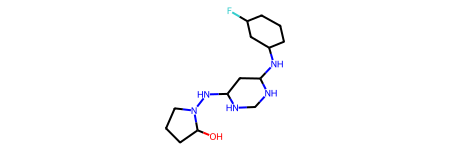

In [7]:
model_pdb_mol

Assign bond orders

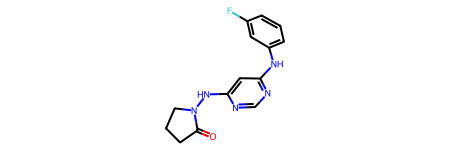

In [8]:
model_pdb_mol = AllChem.AssignBondOrdersFromTemplate(tmplt_mol, model_pdb_mol)
# remove substructure highlighting
model_pdb_mol.__sssAtoms = []
model_pdb_mol

The ligand pdb from mac-x2820.pdb

In [9]:
ref_pdb_str = """HETATM 2545  O1  LIG A 201      -0.204  -2.831  10.900  1.00 20.00           O
HETATM 2546  C1  LIG A 201      -0.978  -2.440  10.130  1.00 20.00           C
HETATM 2547  C2  LIG A 201      -2.086  -3.182   9.413  1.00 20.00           C
HETATM 2548  C3  LIG A 201      -2.897  -2.136   8.698  1.00 20.00           C
HETATM 2549  C4  LIG A 201      -2.064  -0.869   8.691  1.00 20.00           C
HETATM 2550  N1  LIG A 201      -1.016  -1.085   9.687  1.00 20.00           N
HETATM 2551  N2  LIG A 201      -0.133  -0.132  10.153  1.00 20.00           N
HETATM 2552  C5  LIG A 201       1.196  -0.072   9.639  1.00 20.00           C
HETATM 2553  N3  LIG A 201       1.576  -0.912   8.710  1.00 20.00           N
HETATM 2554  C6  LIG A 201       2.795  -0.867   8.242  1.00 20.00           C
HETATM 2555  N4  LIG A 201       3.649   0.025   8.670  1.00 20.00           N
HETATM 2556  C7  LIG A 201       3.299   0.886   9.599  1.00 20.00           C
HETATM 2557  N5  LIG A 201       4.286   1.837  10.024  1.00 20.00           N
HETATM 2558  C8  LIG A 201       4.077   2.857  11.031  1.00 20.00           C
HETATM 2559  C9  LIG A 201       2.981   3.696  11.022  1.00 20.00           C
HETATM 2560  C10 LIG A 201       2.847   4.644  12.014  1.00 20.00           C
HETATM 2561  F1  LIG A 201       1.755   5.471  12.045  1.00 20.00           F
HETATM 2562  C11 LIG A 201       3.815   4.757  12.974  1.00 20.00           C
HETATM 2563  C12 LIG A 201       4.907   3.927  12.958  1.00 20.00           C
HETATM 2564  C13 LIG A 201       5.040   2.972  11.991  1.00 20.00           C
HETATM 2565  C14 LIG A 201       2.044   0.879  10.123  1.00 20.00           C"""

Parse the reference pdb and assign bond orders

In [10]:
ref_pdb_mol = Chem.MolFromPDBBlock(ref_pdb_str)
ref_pdb_mol = AllChem.AssignBondOrdersFromTemplate(tmplt_mol, ref_pdb_mol)
ref_pdb_mol.__sssAtoms = []

View the reference molecule

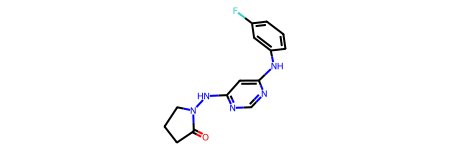

In [11]:
ref_pdb_mol

Calculate RMSD, the **GetBestRMS** function considers symmetry mappings

In [12]:
GetBestRMS(ref_pdb_mol,model_pdb_mol)

0.23443445067511862

Turn on atom indices

In [13]:
IPythonConsole.drawOptions.addAtomIndices = True

Note that the atom numbering doesn't match

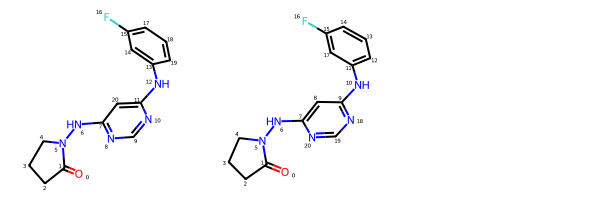

In [14]:
MolsToGridImage([ref_pdb_mol,model_pdb_mol])

Use substructure search to get a mapping between **ref_pdb_mol** and **model_pdb_mol**

In [15]:
match_list = model_pdb_mol.GetSubstructMatches(ref_pdb_mol)[0]

In [16]:
match_list

(0, 1, 2, 3, 4, 5, 6, 7, 20, 19, 18, 9, 10, 11, 17, 15, 16, 14, 13, 12, 8)

Renumber **model_pdb_mol** to match **ref_pdb_mol**

In [17]:
model_pdb_mol = Chem.RenumberAtoms(model_pdb_mol,match_list)

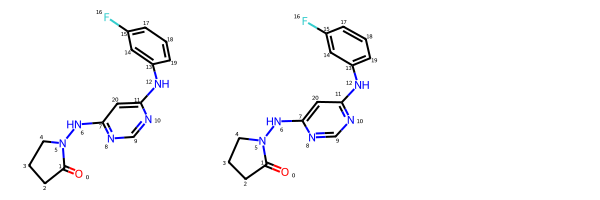

In [18]:
MolsToGridImage([ref_pdb_mol,model_pdb_mol])